In [1]:
!nvidia-smi

Sat Apr 29 07:06:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import numpy as np
import pandas as pd 

%cd drive/MyDrive/Colab\ Notebooks/SLMNIST/archive

/content/drive/MyDrive/Colab Notebooks/SLMNIST/archive


In [3]:
%ls
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

american_sign_language.PNG  sign_mnist_test/     sign_mnist_train.csv
amer_sign2.png              sign_mnist_test.csv
amer_sign3.png              sign_mnist_train/


In [4]:
test_labels = test_data['label']
del test_data['label']
train_labels = train_data['label']
del train_data['label']

In [5]:
train_data = train_data.values
test_data = test_data.values

In [6]:
#train_data = train_data.reshape((60000, 784))
train_data = train_data.astype('float32') / 255

#test_data = test_data.reshape((10000, 784))
test_data = test_data.astype('float32') / 255


In [7]:
import tensorflow
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
x_val = train_data[:7000]
partial_x_train = train_data[7000:]
y_val = train_labels[:7000]
partial_y_train = train_labels[7000:]

In [9]:
from keras import models
from keras import layers
from keras import regularizers
from keras.optimizers import Adam

network = models.Sequential()
network.add(layers.Dense(256, activation="relu", input_shape = (784,), 
                         kernel_regularizer=regularizers.l2(0.001)))

network.add(layers.Dropout(0.2))
network.add(layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.001)))

network.add(layers.Dropout(0.25))
network.add(layers.Dense(256,  activation="relu", kernel_regularizer=regularizers.l2(0.001)))

network.add(layers.Dropout(0.25))
network.add(layers.Dense(256,  activation="relu", kernel_regularizer=regularizers.l2(0.001)))

network.add(layers.Dropout(0.2))
network.add(layers.Dense(25, activation="softmax"))

optimizer = Adam(learning_rate=0.0005)
network.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [10]:
from keras.callbacks import LearningRateScheduler

def lr_decay(epoch, lr):
    return lr * 0.995 ** (epoch // 20)

# создание LearningRateScheduler
lr_scheduler = LearningRateScheduler(lr_decay, verbose=1)

In [11]:
history = network.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    callbacks = [lr_scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 1/100
160/160 [==============================] - 4s 10ms/step - loss: 3.7565 - accuracy: 0.1208 - val_loss: 2.7994 - val_accuracy: 0.3316 - lr: 5.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 2/100
160/160 [==============================] - 1s 9ms/step - loss: 2.5570 - accuracy: 0.3424 - val_loss: 2.0565 - val_accuracy: 0.4980 - lr: 5.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 3/100
160/160 [==============================] - 1s 7ms/step - loss: 2.0531 - accuracy: 0.4686 - val_loss: 1.6151 - val_accuracy: 0.6271 - lr: 5.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0005000000237487257.
Epoch 4/100
160/160 [==============================] - 1s 7ms/step - loss: 1.7474 - accuracy: 0.5564 - val_loss: 1.3565 - val_accuracy: 0.7056 - lr: 5.0000e-04

Epoch 5: LearningRateScheduler setting

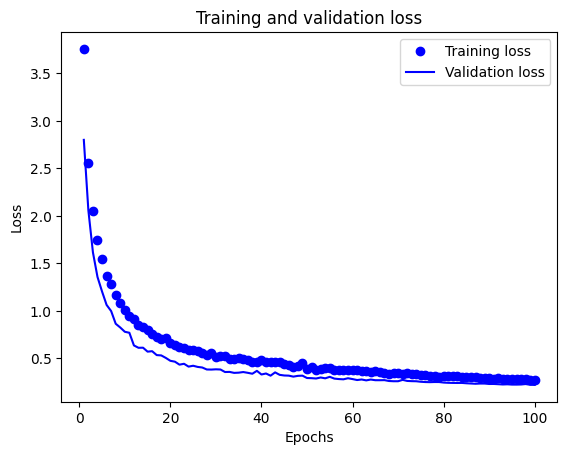

In [12]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [13]:
test_loss, test_acc = network.evaluate(test_data, test_labels)
test_acc

225/225 [==============================] - 1s 3ms/step - loss: 1.0578 - accuracy: 0.7896


0.7895984649658203